In [1]:
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages')
import numpy as np
import pandas as pd
from scipy.stats import binom

In [2]:
snapData = pd.read_csv('../data/raw/countiesDataPerCapitaSnapshot.csv')

In [3]:
snapData.head()

,date,county,state,pop,cases,deaths,casesPerCapita,deathsPerCapita
0,44034,Autauga County,Alabama,71518.0,886,21,0.012388,0.000294
1,44034,Baldwin County,Alabama,45720.0,2196,16,0.048031,0.000350
2,44034,Barbour County,Alabama,18395.0,518,4,0.028160,0.000217
3,44034,Bibb County,Alabama,155547.0,287,2,0.001845,0.000013
4,44034,Blount County,Alabama,13063.0,547,1,0.041874,0.000077


In [4]:
snapData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3206 entries, 0 to 3205
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             3206 non-null   int64  
 1   county           3206 non-null   object 
 2   state            3206 non-null   object 
 3   pop              3128 non-null   float64
 4   cases            3206 non-null   int64  
 5   deaths           3206 non-null   int64  
 6   casesPerCapita   3128 non-null   float64
 7   deathsPerCapita  3128 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 200.5+ KB


In [5]:
snapData.describe()

,date,pop,cases,deaths,casesPerCapita,deathsPerCapita
count,3206.0,3.128000e+03,3206.000000,3206.000000,3128.000000,3128.000000
mean,44034.0,7.145710e+04,1241.431691,44.598253,0.084160,0.002930
std,0.0,1.586812e+05,6680.148556,447.486339,0.666674,0.030307
min,44034.0,9.840000e+02,0.000000,0.000000,0.000000,0.000000
25%,44034.0,1.099800e+04,40.000000,0.000000,0.001228,0.000000
50%,44034.0,2.331600e+04,146.000000,2.000000,0.006062,0.000067
75%,44034.0,5.349700e+04,558.750000,12.000000,0.025719,0.000533
max,44034.0,1.809034e+06,227130.000000,22899.000000,28.604698,1.370470


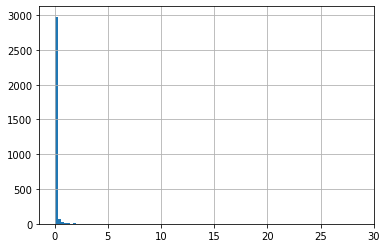

In [6]:
casesHist = snapData['casesPerCapita'].hist(bins=100)

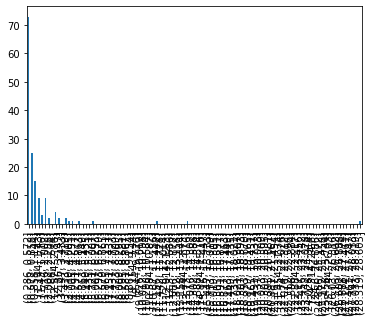

In [7]:
#casesHist = snapData['casesPerCapita'].hist(bins=100)
out = pd.cut(snapData['casesPerCapita'], bins=100)
counts = out.value_counts(sort=False)
plt = counts[counts < 1000].plot.bar()
#plt.axis('off')
plt.axes.get_xaxis().get_label().set_visible(False)

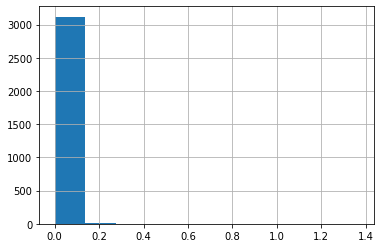

In [8]:
casesHist = snapData['deathsPerCapita'].hist(bins=10)

In [9]:
#From looking at the histograms, I am not seeing any distribution that the number of cases or number of deaths per capita
#seem to follow
#From a theoretical perspective, we would expect that each individual person has a certain chance of living and a
#certain chance of dying. That would tend to mean that the total deaths/cases distribution for a certain county would be a
#binomial distribution with probability p and n being the number of people in the county. This is maybe not the best model
#because the deaths and cases would be correlated to each other. Supposing that the correlation wasn't the case, we still
#couldn't use it because we are actually trying to model deaths/cases per capita and do that for each county as our distribution.
#The fact we are doing per capita messes up our nice binomial distribution. We must use per capita though or we can't compare
#counties. This means that we can't use a classical statistically based method of finding anomalies.